# Down sampling the ECG

In [2]:
import wfdb
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample_poly

In [3]:
def resample_ecg(ecg_signal, orig_fs, target_fs):
    """
    Resample ECG signal from orig_fs to target_fs using polyphase filtering.
    ecg_signal: 1D (or 2D) numpy array (samples x channels)
    """
    # For example, if orig_fs=250, target_fs=128:
    # up = 128, down = 250
    up = target_fs
    down = orig_fs

    if ecg_signal.ndim == 1:
        ecg_resampled = resample_poly(ecg_signal, up, down)
    else:
        # If multi-channel, resample each column
        ecg_resampled = np.array([
            resample_poly(ecg_signal[:, ch], up, down) 
            for ch in range(ecg_signal.shape[1])
        ]).T

    return ecg_resampled

In [5]:
record_path_30 = './data/scddb/30'
record_30 = wfdb.rdrecord(record_path_30)
fs_30 = record_30.fs

In [6]:
vfon_str_30 = "07:54:33"
def hms_to_seconds(hms):
    h, m, s = hms.split(":")
    return int(h)*3600 + int(m)*60 + int(s)

vfon_seconds_30 = hms_to_seconds(vfon_str_30)

vfon_sample_30 = vfon_seconds_30 * fs_30
print(f"VF onset sample index for record 30: {vfon_sample_30}")

VF onset sample index for record 30: 7118250


In [7]:
pre_event_sec_30 = 60 * 5  # 5 minutes
pre_event_samples_30 = int(pre_event_sec_30 * fs_30)

start_idx_30 = max(0, vfon_sample_30 - pre_event_samples_30)
end_idx_30 = vfon_sample_30  # up to the VF onset

ecg_segment_30_5min_before_VF = record_30.p_signal[start_idx_30:end_idx_30, :]  # shape (samples, 2) if 2 channels

print(f"Extracted a {pre_event_sec_30}-second segment before VF onset.")

Extracted a 300-second segment before VF onset.


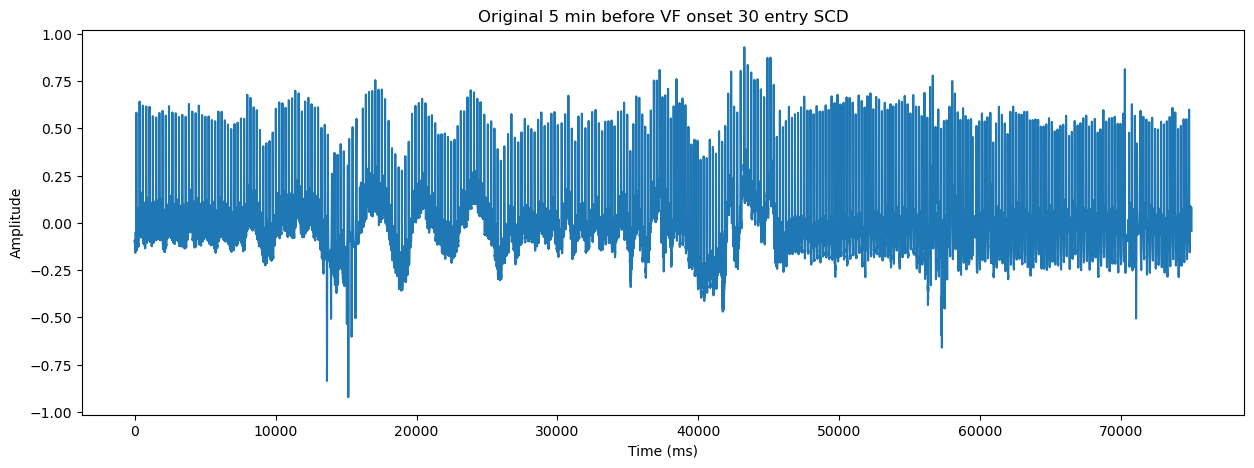

In [9]:
plt.figure(figsize=(15, 5))
plt.subplot()
plt.plot(ecg_segment_30_5min_before_VF[:,0])
plt.title('Original 5 min before VF onset 30 entry SCD')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

In [10]:
ecg_resmple = resample_ecg(ecg_segment_30_5min_before_VF[:,0], 250, 128)

In [11]:
ecg_resmple

array([-0.0715235 , -0.10325322, -0.09964019, ..., -0.03350907,
       -0.03113093, -0.04236117])

In [12]:
ecg_segment_30_5min_before_VF

array([[-0.0975 , -0.06625],
       [-0.09125, -0.06875],
       [-0.09875, -0.07   ],
       ...,
       [-0.03625,  0.0825 ],
       [-0.03875,  0.08375],
       [-0.0425 ,  0.085  ]])

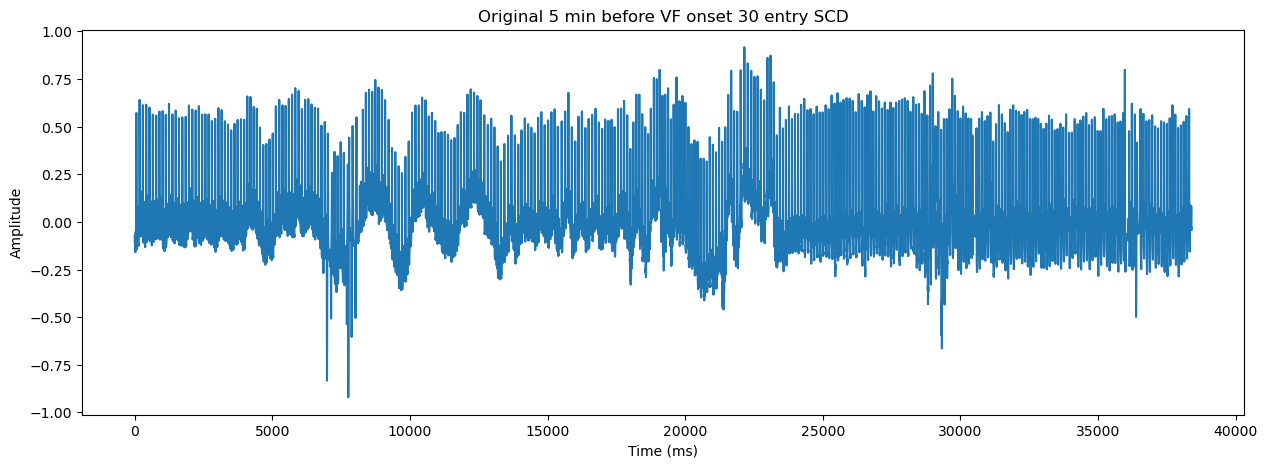

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot()
plt.plot(ecg_resmple)
plt.title('Original 5 min before VF onset 30 entry SCD')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

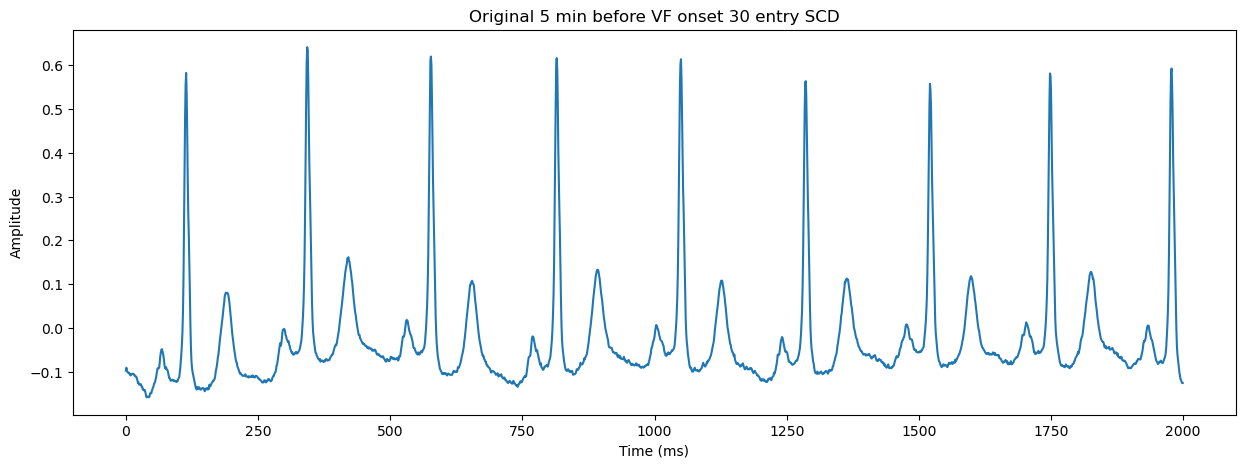

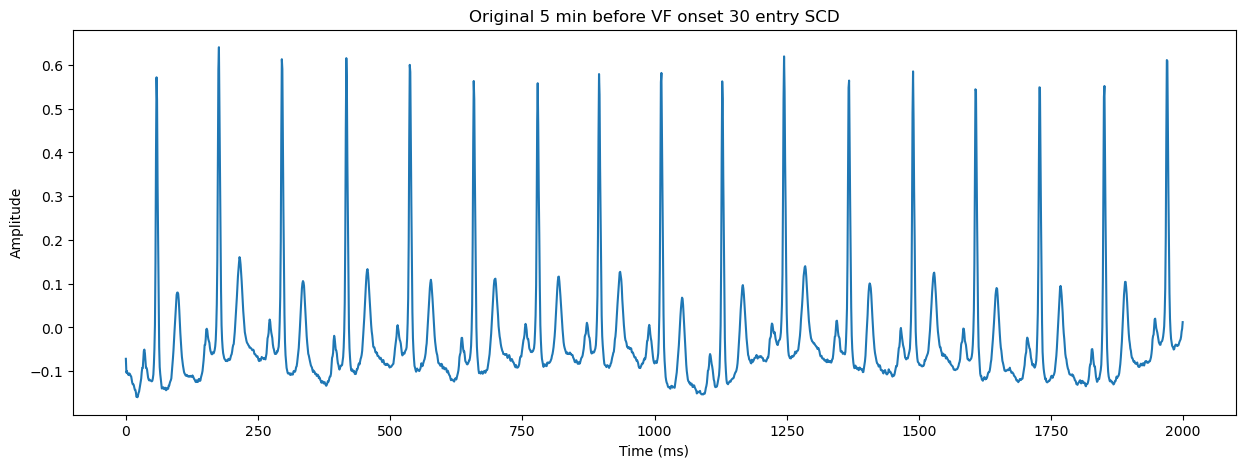

In [14]:
plt.figure(figsize=(15, 5))
plt.subplot()
plt.plot(ecg_segment_30_5min_before_VF[:,0][:2000])
plt.title('Original 5 min before VF onset 30 entry SCD')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

plt.figure(figsize=(15, 5))
plt.subplot()
plt.plot(ecg_resmple[:2000])
plt.title('Original 5 min before VF onset 30 entry SCD')
plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')

plt.show()

In [15]:
ecg_resmple.shape

(38400,)

In [16]:
ecg_segment_30_5min_before_VF[:,0].shape

(75000,)

In [17]:
len(ecg_resmple)

38400

In [19]:
len(ecg_segment_30_5min_before_VF[:,0])

75000